In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

## Since the range of values of raw data varies widely, we use Minmax Scale to do data normalisation. Then we choose 0.1 as error of margin to calculate how many trials we need to do at least( due to the limited time and restrict computer space). If we choose the average of trials we got, it should be 11 times at least.

In [31]:
Goes_to_the_biggest_fire = pd.read_csv('/Users/tanqingwen/Desktop/test2/Goes to the biggest fire/statistics.csv')
Goes_to_the_closest_fire = pd.read_csv('/Users/tanqingwen/Desktop/test2/Goes to the closest fire/statistics.csv')
Indirect_attack = pd.read_csv('/Users/tanqingwen/Desktop/test2/Indirect attack/statistics.csv')
Optimized_closest = pd.read_csv('/Users/tanqingwen/Desktop/test2/Optimized closest/statistics.csv')
Optimized_Parallel_attack = pd.read_csv('/Users/tanqingwen/Desktop/test2/Optimized Parallel attack/statistics.csv')
Parallel_attack = pd.read_csv('/Users/tanqingwen/Desktop/test2/Parallel attack/statistics.csv')
Random_movements = pd.read_csv('/Users/tanqingwen/Desktop/test2/Random movements/statistics.csv')

In [32]:
from sklearn.preprocessing import MinMaxScaler
def min_max_scale_dataframe(df):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    return scaled_df

In [33]:
# histograms function
def plot_histograms_with_annotations(df, columns_to_plot):
    plt.figure(figsize=(40, 15))
    
    for i, column_name in enumerate(columns_to_plot):
        plt.subplot(2, 4, i+1)  # Assuming you want a 2x4 grid for 7 histograms
        
        data = df[column_name]
        mean = data.mean()
        std_dev = data.std()
        variance = data.var()
        
        sns.histplot(data, kde=True)
        
        plt.title(f'{column_name} Histogram')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        #plt.axvline(x=mean + 2 * std_dev, color='r', linestyle='--', label='+2 SD')
        #plt.axvline(x=mean - 2 * std_dev, color='r', linestyle='--', label='-2 SD')
        
        #plt.annotate(f'Mean: {mean:.2f}', xy=(mean, 0), xytext=(mean + 1, 50),
                     #arrowprops=dict(facecolor='black', arrowstyle='->'),
                     #fontsize=12)
        
        #plt.annotate(f'Variance: {variance:.2f}', xy=(mean, 0), xytext=(mean - 3, 40),
                     #arrowprops=dict(facecolor='red', arrowstyle='->'),
                     #fontsize=12, color='red')
        
    plt.tight_layout()
    plt.show()

In [34]:
def compute_statistics(df, columns_to_analyze):
    data = []
    for column in columns_to_analyze:
        min=df[column].min()
        max=df[column].max()
        mean = df[column].mean()
        median = df[column].median()
        st_deviation = df[column].std()
        # round up to the nearest whole number
        n = math.ceil((1.96*st_deviation/0.1)**2)
        data.append([column,min,max, mean, median,st_deviation, n])

    results = pd.DataFrame(data, columns=['Parameter', 'min','max','Mean', 'Median','st_deviation','n'])
    return results

# Goes_to_the_biggest_fire

In [35]:
columns_to_analyze = Goes_to_the_biggest_fire.columns
statistics_table = compute_statistics(Goes_to_the_biggest_fire, columns_to_analyze)
print(statistics_table)
statistics_table.to_csv('/Users/tanqingwen/Desktop/test2/Goes to the biggest fire/statistics_rawdata.csv', index=False)

                                   Parameter        min      max         Mean  \
0          Number_of_steps_to_ExtinguishFire     6.0000   108.00     6.101898   
1            Number_of_extinguished_firecell     0.0000   119.00     5.234765   
2                  Number_of_burned_out_cell     1.0000  2652.00     3.648352   
3                    Number_of_cells_on_fire     1.0000  2771.00     8.883117   
4        Maximum_growthrate_firecell_perstep     0.0000    22.00     3.146853   
5  Maximum_extinguishedrate_firecell_perstep     0.0000    13.00     3.830170   
6                        Count_healthy_trees  3748.0000  6399.00  6395.299700   
7                      Count_unhealthy_trees     1.0000  2652.00     4.700300   
8             Percentage_damaged_burnedtrees     0.0125    33.15     0.058754   

      Median  st_deviation        n  
0     6.0000      3.223912     3993  
1     4.0000      4.572945     8034  
2     1.0000     83.790096  2697103  
3     5.0000     87.434978  2936856  

In [36]:
scaled_df = min_max_scale_dataframe(Goes_to_the_biggest_fire)
columns_to_analyze = scaled_df.columns
statistics_table = compute_statistics(scaled_df, columns_to_analyze)
print(statistics_table)
statistics_table.to_csv('/Users/tanqingwen/Desktop/test2/Goes to the biggest fire/statistics_newdata.csv', index=False)

                                   Parameter  min  max      Mean    Median  \
0          Number_of_steps_to_ExtinguishFire  0.0  1.0  0.000999  0.000000   
1            Number_of_extinguished_firecell  0.0  1.0  0.043990  0.033613   
2                  Number_of_burned_out_cell  0.0  1.0  0.000999  0.000000   
3                    Number_of_cells_on_fire  0.0  1.0  0.002846  0.001444   
4        Maximum_growthrate_firecell_perstep  0.0  1.0  0.143039  0.136364   
5  Maximum_extinguishedrate_firecell_perstep  0.0  1.0  0.294628  0.230769   
6                        Count_healthy_trees  0.0  1.0  0.998604  1.000000   
7                      Count_unhealthy_trees  0.0  1.0  0.001396  0.000000   
8             Percentage_damaged_burnedtrees  0.0  1.0  0.001396  0.000000   

   st_deviation   n  
0      0.031607   1  
1      0.038428   1  
2      0.031607   1  
3      0.031565   1  
4      0.064434   2  
5      0.173122  12  
6      0.031600   1  
7      0.031600   1  
8      0.031600   1  

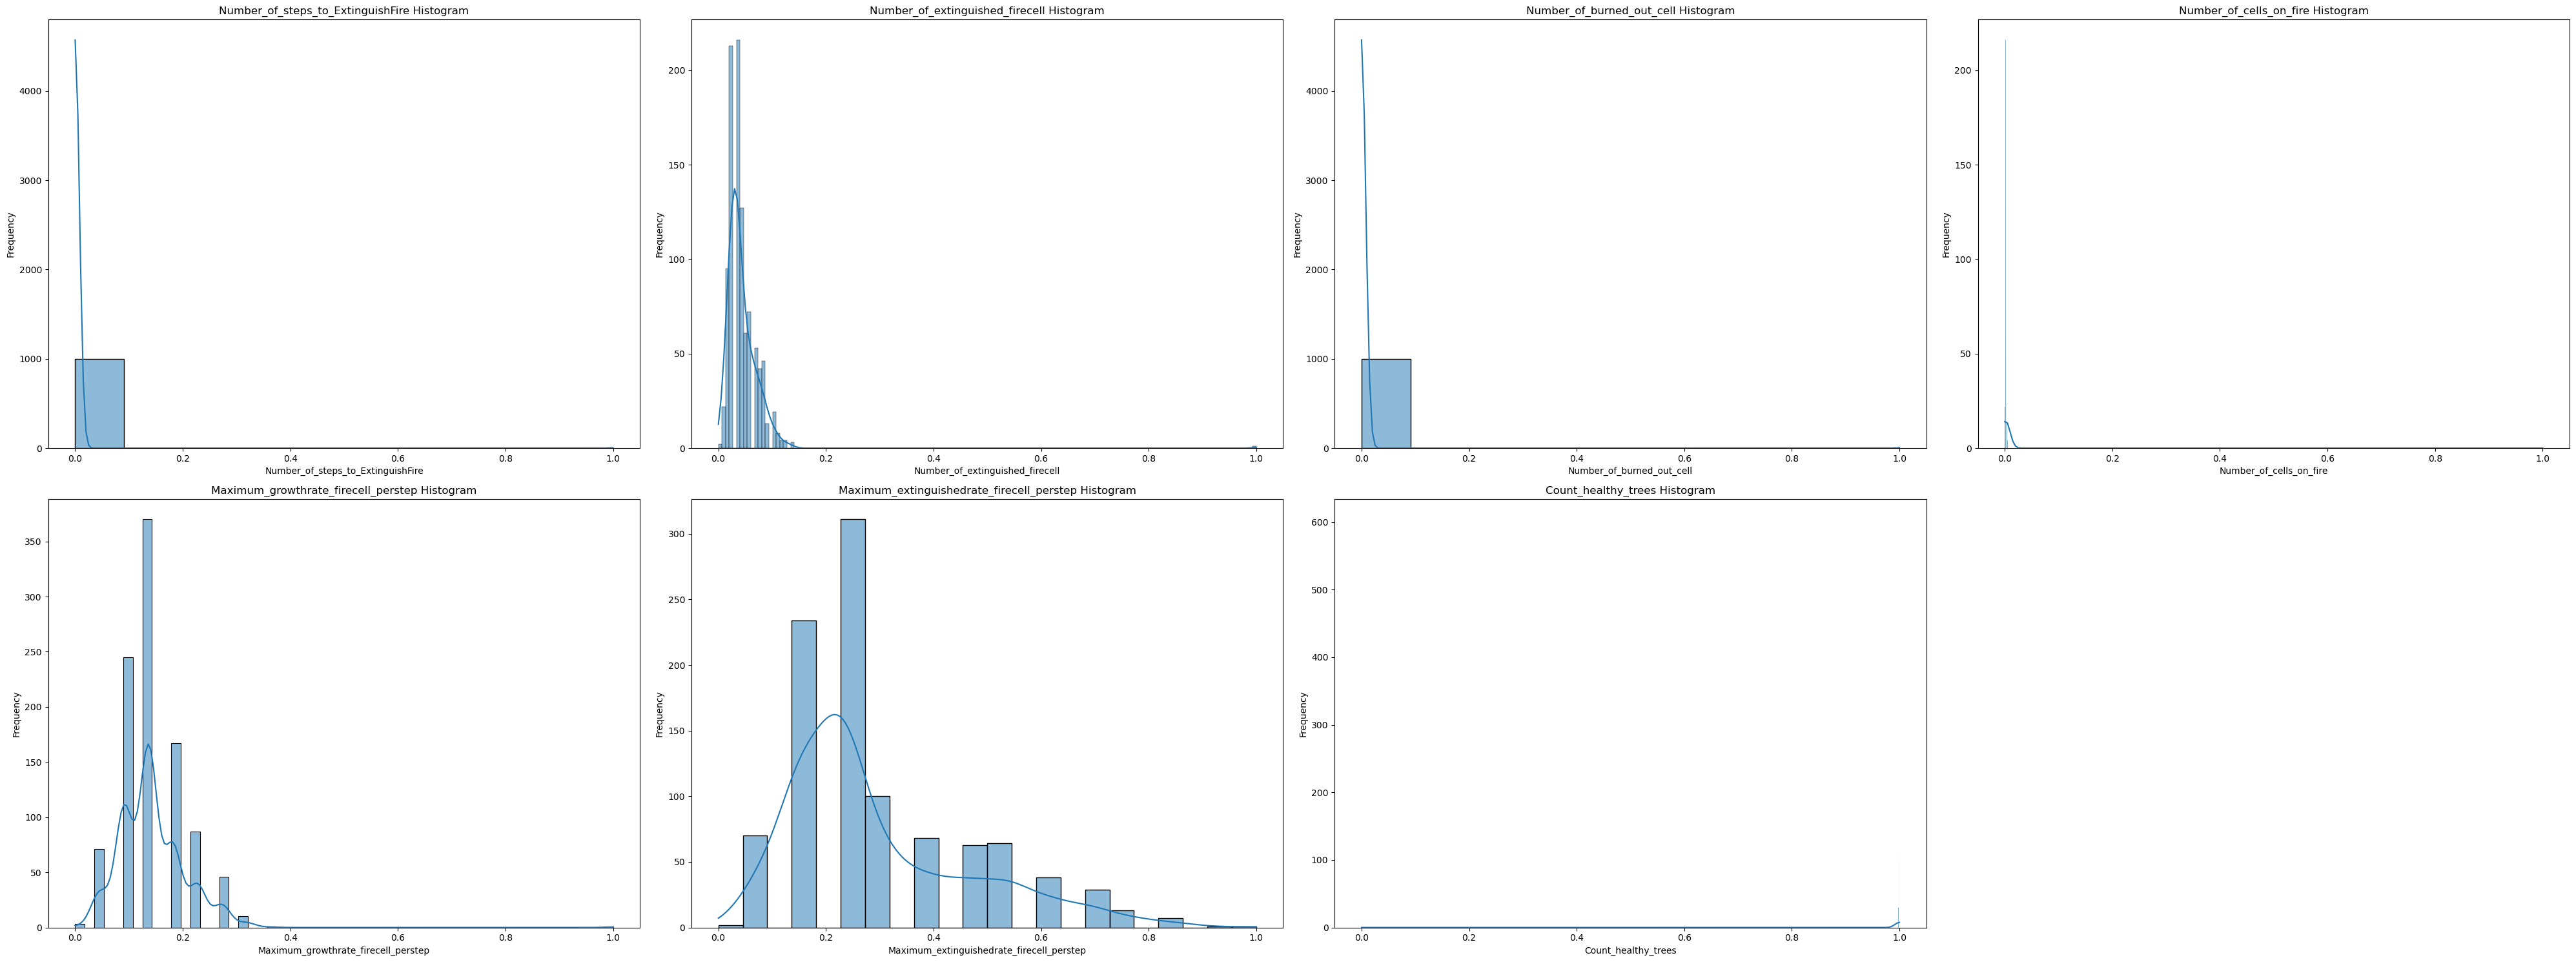

In [37]:
plot_histograms_with_annotations(scaled_df, scaled_df.columns[:7])

# Goes_to_the_closest_fire

In [38]:

statistics_table = compute_statistics(Goes_to_the_closest_fire, columns_to_analyze)
print(statistics_table)
statistics_table.to_csv('/Users/tanqingwen/Desktop/test2/Goes to the closest fire/statistics_rawdata.csv', index=False)

                                   Parameter        min      max         Mean  \
0          Number_of_steps_to_ExtinguishFire     6.0000     6.00     6.000000   
1            Number_of_extinguished_firecell     0.0000    19.00     5.228771   
2                  Number_of_burned_out_cell     1.0000     1.00     1.000000   
3                    Number_of_cells_on_fire     1.0000    20.00     6.228771   
4        Maximum_growthrate_firecell_perstep     0.0000     9.00     3.162837   
5  Maximum_extinguishedrate_firecell_perstep     0.0000    16.00     3.871129   
6                        Count_healthy_trees  6388.0000  6399.00  6397.904096   
7                      Count_unhealthy_trees     1.0000    12.00     2.095904   
8             Percentage_damaged_burnedtrees     0.0125     0.15     0.026199   

      Median  st_deviation     n  
0     6.0000      0.000000     0  
1     4.0000      2.869253  3163  
2     1.0000      0.000000     0  
3     5.0000      2.869253  3163  
4     3.0000  

In [39]:
scaled_df = min_max_scale_dataframe(Goes_to_the_closest_fire)
columns_to_analyze = scaled_df.columns
statistics_table = compute_statistics(scaled_df, columns_to_analyze)
print(statistics_table)
statistics_table.to_csv('/Users/tanqingwen/Desktop/test2/Goes to the closest fire/statistics_newdata.csv', index=False)

                                   Parameter  min  max      Mean    Median  \
0          Number_of_steps_to_ExtinguishFire  0.0  0.0  0.000000  0.000000   
1            Number_of_extinguished_firecell  0.0  1.0  0.275198  0.210526   
2                  Number_of_burned_out_cell  0.0  0.0  0.000000  0.000000   
3                    Number_of_cells_on_fire  0.0  1.0  0.275198  0.210526   
4        Maximum_growthrate_firecell_perstep  0.0  1.0  0.351426  0.333333   
5  Maximum_extinguishedrate_firecell_perstep  0.0  1.0  0.241946  0.187500   
6                        Count_healthy_trees  0.0  1.0  0.900372  1.000000   
7                      Count_unhealthy_trees  0.0  1.0  0.099628  0.000000   
8             Percentage_damaged_burnedtrees  0.0  1.0  0.099628  0.000000   

   st_deviation  n  
0      0.000000  0  
1      0.151013  9  
2      0.000000  0  
3      0.151013  9  
4      0.146163  9  
5      0.142746  8  
6      0.150668  9  
7      0.150668  9  
8      0.150668  9  


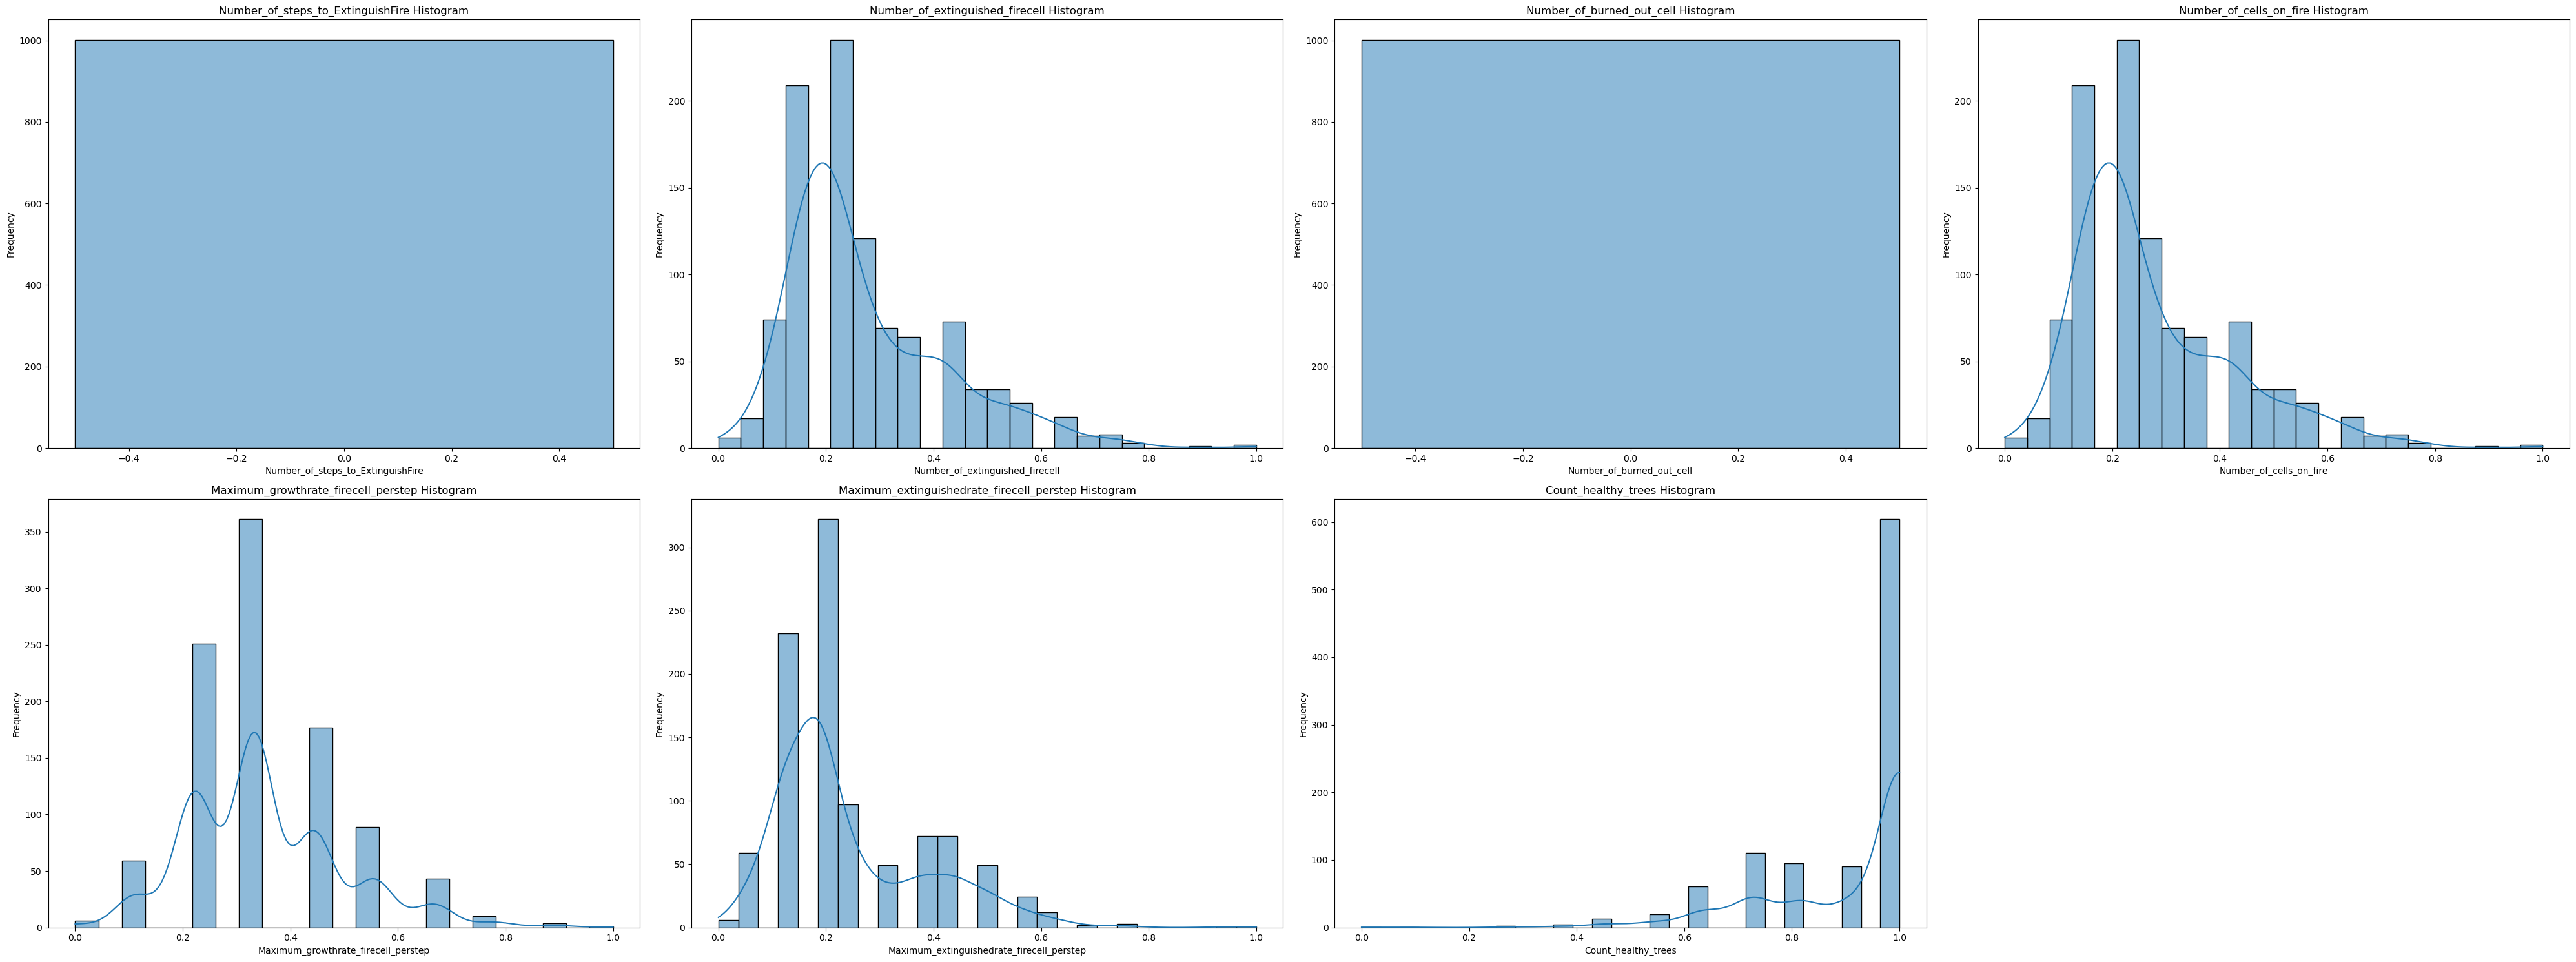

In [40]:
plot_histograms_with_annotations(scaled_df, scaled_df.columns[:7])

# Indirect_attack

In [41]:
columns_to_analyze = Indirect_attack.columns
statistics_table = compute_statistics(Indirect_attack, columns_to_analyze)
print(statistics_table)
statistics_table.to_csv('/Users/tanqingwen/Desktop/test2/Indirect attack/statistics_rawdata.csv', index=False)

                                   Parameter        min        max  \
0          Number_of_steps_to_ExtinguishFire     6.0000   165.0000   
1            Number_of_extinguished_firecell    18.0000   186.0000   
2                  Number_of_burned_out_cell     1.0000  3523.0000   
3                    Number_of_cells_on_fire    19.0000  3638.0000   
4        Maximum_growthrate_firecell_perstep     6.0000    56.0000   
5  Maximum_extinguishedrate_firecell_perstep     4.0000    10.0000   
6                        Count_healthy_trees  2877.0000  6399.0000   
7                      Count_unhealthy_trees     1.0000  3523.0000   
8             Percentage_damaged_burnedtrees     0.0125    44.0375   

          Mean   Median  st_deviation         n  
0    93.663337    92.00     16.032328     98743  
1   143.481518   146.00     19.046887    139368  
2  2520.890110  2532.00    347.006150  46257962  
3  2664.371628  2684.00    346.861537  46219414  
4    28.791209    28.00      6.058000     14099  

In [42]:
scaled_df = min_max_scale_dataframe(Indirect_attack)
columns_to_analyze = scaled_df.columns
statistics_table = compute_statistics(scaled_df, columns_to_analyze)
print(statistics_table)
statistics_table.to_csv('/Users/tanqingwen/Desktop/test2/Indirect attack/statistics_newdata.csv', index=False)

                                   Parameter  min  max      Mean    Median  \
0          Number_of_steps_to_ExtinguishFire  0.0  1.0  0.551342  0.540881   
1            Number_of_extinguished_firecell  0.0  1.0  0.746914  0.761905   
2                  Number_of_burned_out_cell  0.0  1.0  0.715471  0.718626   
3                    Number_of_cells_on_fire  0.0  1.0  0.730968  0.736391   
4        Maximum_growthrate_firecell_perstep  0.0  1.0  0.455824  0.440000   
5  Maximum_extinguishedrate_firecell_perstep  0.0  1.0  0.350982  0.333333   
6                        Count_healthy_trees  0.0  1.0  0.284529  0.281374   
7                      Count_unhealthy_trees  0.0  1.0  0.715471  0.718626   
8             Percentage_damaged_burnedtrees  0.0  1.0  0.715471  0.718626   

   st_deviation   n  
0      0.100832   4  
1      0.113374   5  
2      0.098525   4  
3      0.095845   4  
4      0.121160   6  
5      0.159232  10  
6      0.098525   4  
7      0.098525   4  
8      0.098525   4  

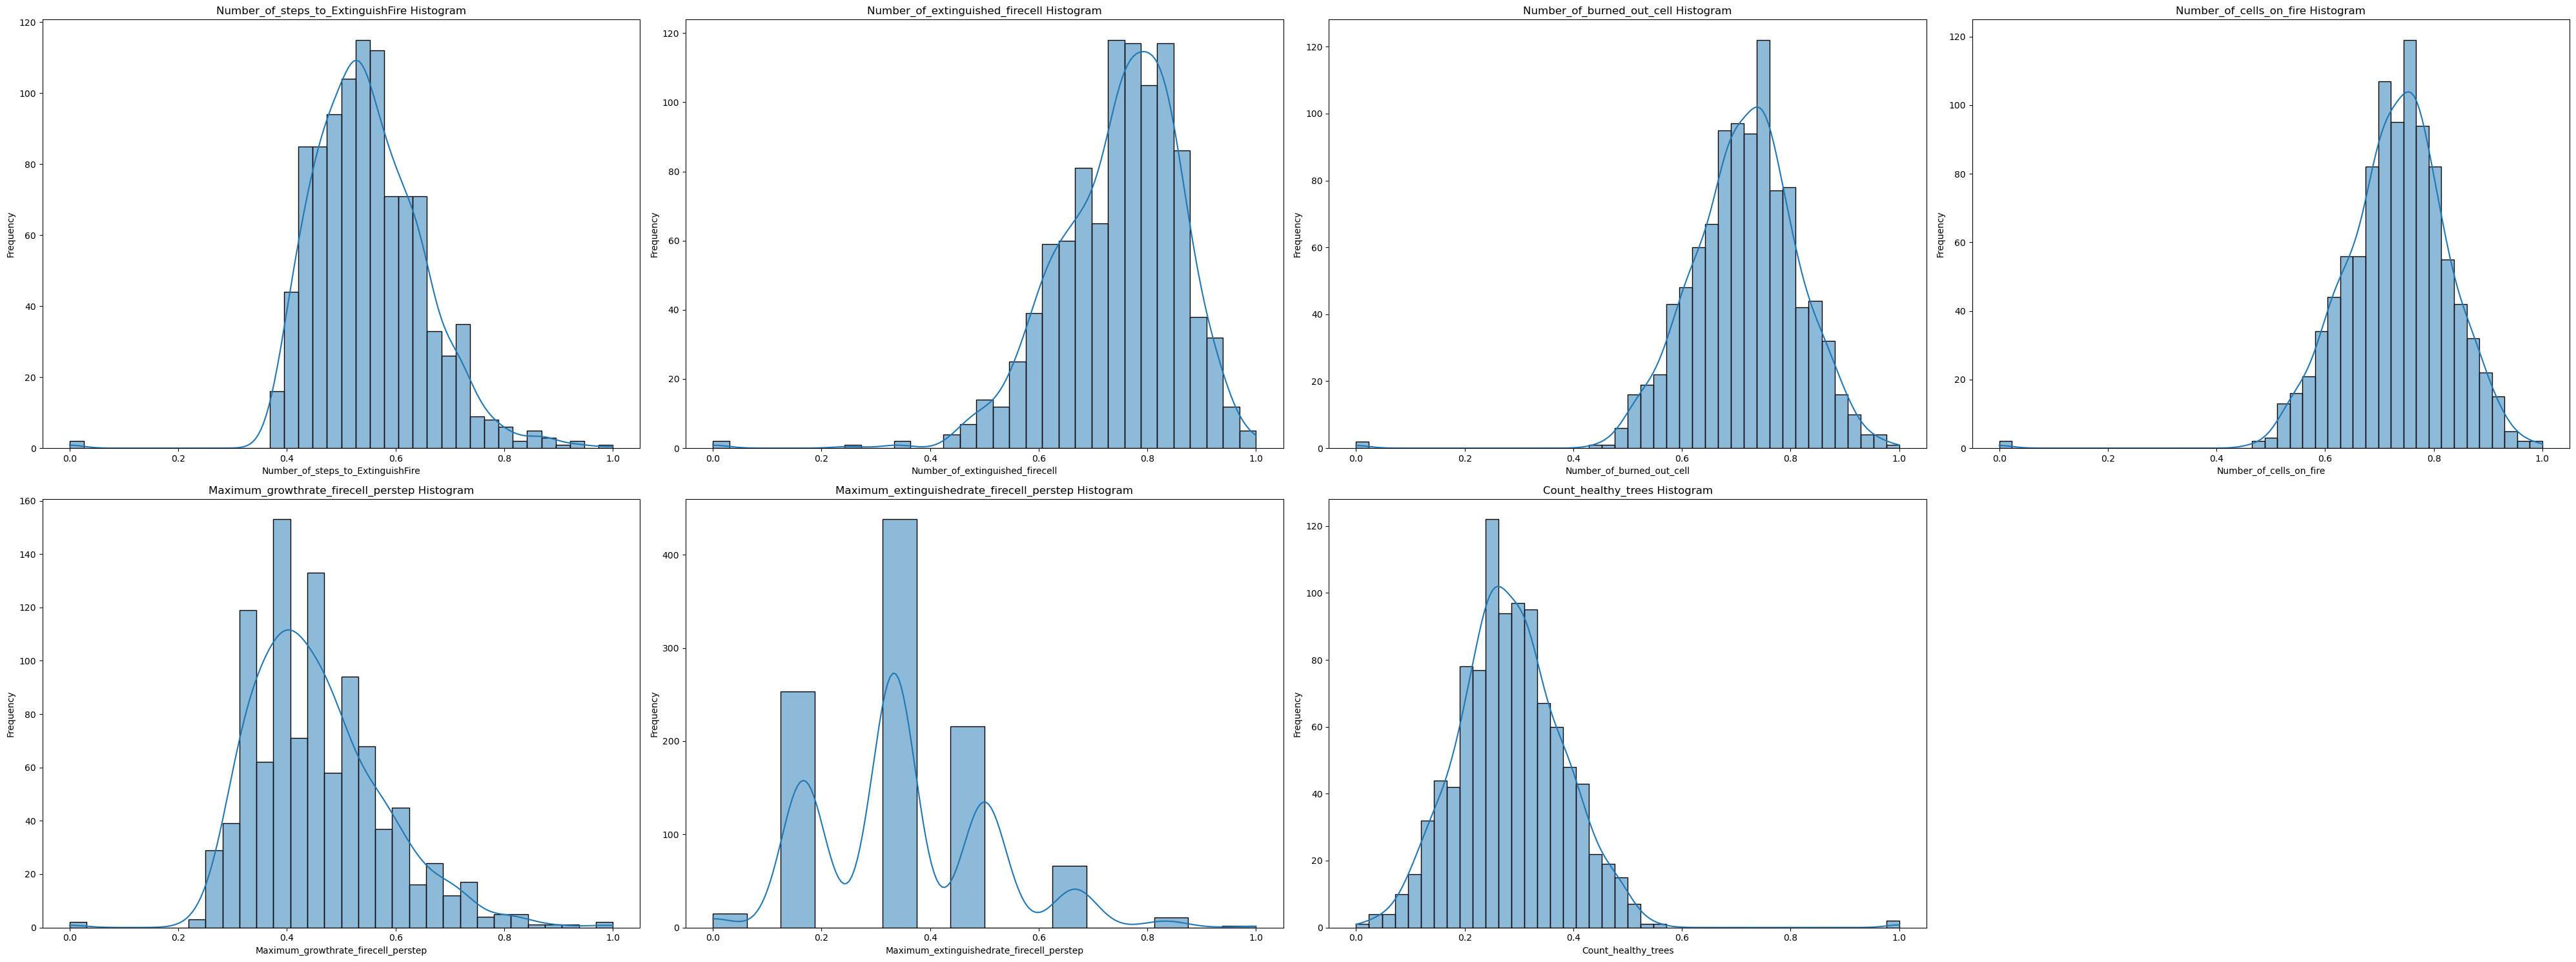

In [43]:
plot_histograms_with_annotations(scaled_df, scaled_df.columns[:7])

# Optimized_closest

In [44]:
columns_to_analyze = Optimized_closest.columns
statistics_table = compute_statistics(Optimized_closest, columns_to_analyze)
print(statistics_table)
statistics_table.to_csv('/Users/tanqingwen/Desktop/test2/Optimized closest/statistics_rawdata.csv', index=False)

                                   Parameter        min        max  \
0          Number_of_steps_to_ExtinguishFire     6.0000     6.0000   
1            Number_of_extinguished_firecell     1.0000    18.0000   
2                  Number_of_burned_out_cell     1.0000     1.0000   
3                    Number_of_cells_on_fire     2.0000    19.0000   
4        Maximum_growthrate_firecell_perstep     1.0000     8.0000   
5  Maximum_extinguishedrate_firecell_perstep     1.0000    15.0000   
6                        Count_healthy_trees  6389.0000  6399.0000   
7                      Count_unhealthy_trees     1.0000    11.0000   
8             Percentage_damaged_burnedtrees     0.0125     0.1375   

          Mean     Median  st_deviation     n  
0     6.000000     6.0000      0.000000     0  
1     5.591409     4.0000      3.267703  4103  
2     1.000000     1.0000      0.000000     0  
3     6.591409     5.0000      3.267703  4103  
4     3.178821     3.0000      1.345731   696  
5     3.915

In [45]:
scaled_df = min_max_scale_dataframe(Optimized_closest)
columns_to_analyze = scaled_df.columns
statistics_table = compute_statistics(scaled_df, columns_to_analyze)
print(statistics_table)
statistics_table.to_csv('/Users/tanqingwen/Desktop/test2/Optimized closest/statistics_newdata.csv', index=False)

                                   Parameter  min  max      Mean    Median  \
0          Number_of_steps_to_ExtinguishFire  0.0  0.0  0.000000  0.000000   
1            Number_of_extinguished_firecell  0.0  1.0  0.270083  0.176471   
2                  Number_of_burned_out_cell  0.0  0.0  0.000000  0.000000   
3                    Number_of_cells_on_fire  0.0  1.0  0.270083  0.176471   
4        Maximum_growthrate_firecell_perstep  0.0  1.0  0.311260  0.285714   
5  Maximum_extinguishedrate_firecell_perstep  0.0  1.0  0.208220  0.142857   
6                        Count_healthy_trees  0.0  1.0  0.862238  1.000000   
7                      Count_unhealthy_trees  0.0  1.0  0.137762  0.000000   
8             Percentage_damaged_burnedtrees  0.0  1.0  0.137762  0.000000   

   st_deviation   n  
0      0.000000   0  
1      0.192218  15  
2      0.000000   0  
3      0.192218  15  
4      0.192247  15  
5      0.165119  11  
6      0.190296  14  
7      0.190296  14  
8      0.190296  14  

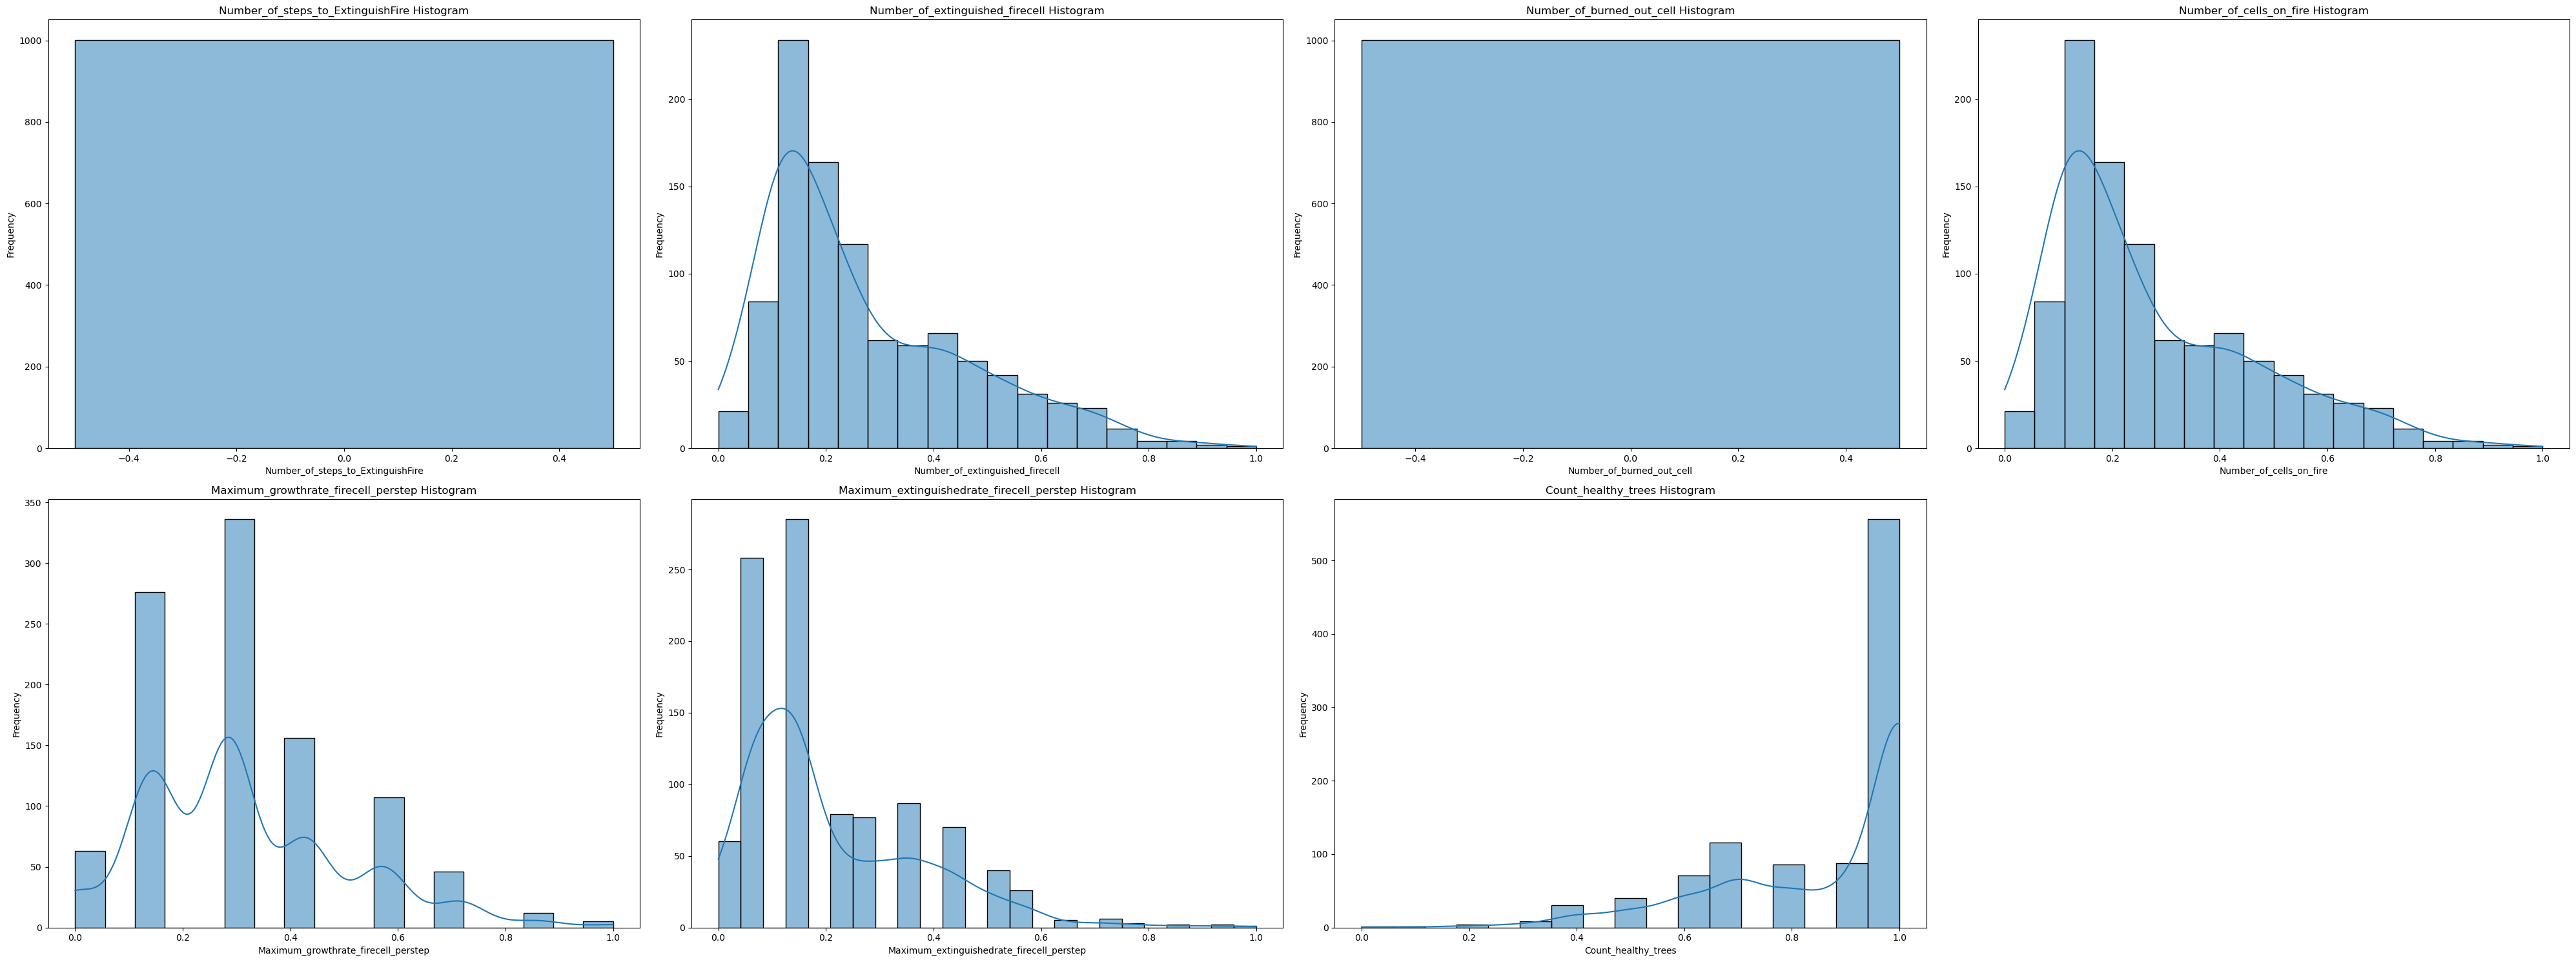

In [46]:
plot_histograms_with_annotations(scaled_df, scaled_df.columns[:7])

# Optimized_Parallel_attack

In [47]:
columns_to_analyze = Optimized_Parallel_attack.columns
statistics_table = compute_statistics(Optimized_Parallel_attack, columns_to_analyze)
print(statistics_table)
statistics_table.to_csv('/Users/tanqingwen/Desktop/test2/Optimized Parallel attack/statistics_rawdata.csv', index=False)

                                   Parameter        min       max  \
0          Number_of_steps_to_ExtinguishFire     6.0000     9.000   
1            Number_of_extinguished_firecell     0.0000    29.000   
2                  Number_of_burned_out_cell     1.0000     2.000   
3                    Number_of_cells_on_fire     1.0000    30.000   
4        Maximum_growthrate_firecell_perstep     0.0000    10.000   
5  Maximum_extinguishedrate_firecell_perstep     0.0000    15.000   
6                        Count_healthy_trees  6382.0000  6399.000   
7                      Count_unhealthy_trees     1.0000    18.000   
8             Percentage_damaged_burnedtrees     0.0125     0.225   

          Mean     Median  st_deviation     n  
0     6.015984     6.0000      0.154092    10  
1     6.828172     6.0000      3.847914  5689  
2     1.002997     1.0000      0.054690     2  
3     7.831169     7.0000      3.857002  5715  
4     3.393606     3.0000      1.402469   756  
5     4.336663     4.

In [48]:
scaled_df = min_max_scale_dataframe(Optimized_Parallel_attack)
columns_to_analyze = scaled_df.columns
statistics_table = compute_statistics(scaled_df, columns_to_analyze)
print(statistics_table)
statistics_table.to_csv('/Users/tanqingwen/Desktop/test2/Optimized Parallel attack/statistics_newdata.csv', index=False)

                                   Parameter  min  max      Mean    Median  \
0          Number_of_steps_to_ExtinguishFire  0.0  1.0  0.005328  0.000000   
1            Number_of_extinguished_firecell  0.0  1.0  0.235454  0.206897   
2                  Number_of_burned_out_cell  0.0  1.0  0.002997  0.000000   
3                    Number_of_cells_on_fire  0.0  1.0  0.235558  0.206897   
4        Maximum_growthrate_firecell_perstep  0.0  1.0  0.339361  0.300000   
5  Maximum_extinguishedrate_firecell_perstep  0.0  1.0  0.289111  0.266667   
6                        Count_healthy_trees  0.0  1.0  0.876770  0.882353   
7                      Count_unhealthy_trees  0.0  1.0  0.123230  0.117647   
8             Percentage_damaged_burnedtrees  0.0  1.0  0.123230  0.117647   

   st_deviation   n  
0      0.051364   2  
1      0.132687   7  
2      0.054690   2  
3      0.133000   7  
4      0.140247   8  
5      0.154884  10  
6      0.128203   7  
7      0.128203   7  
8      0.128203   7  

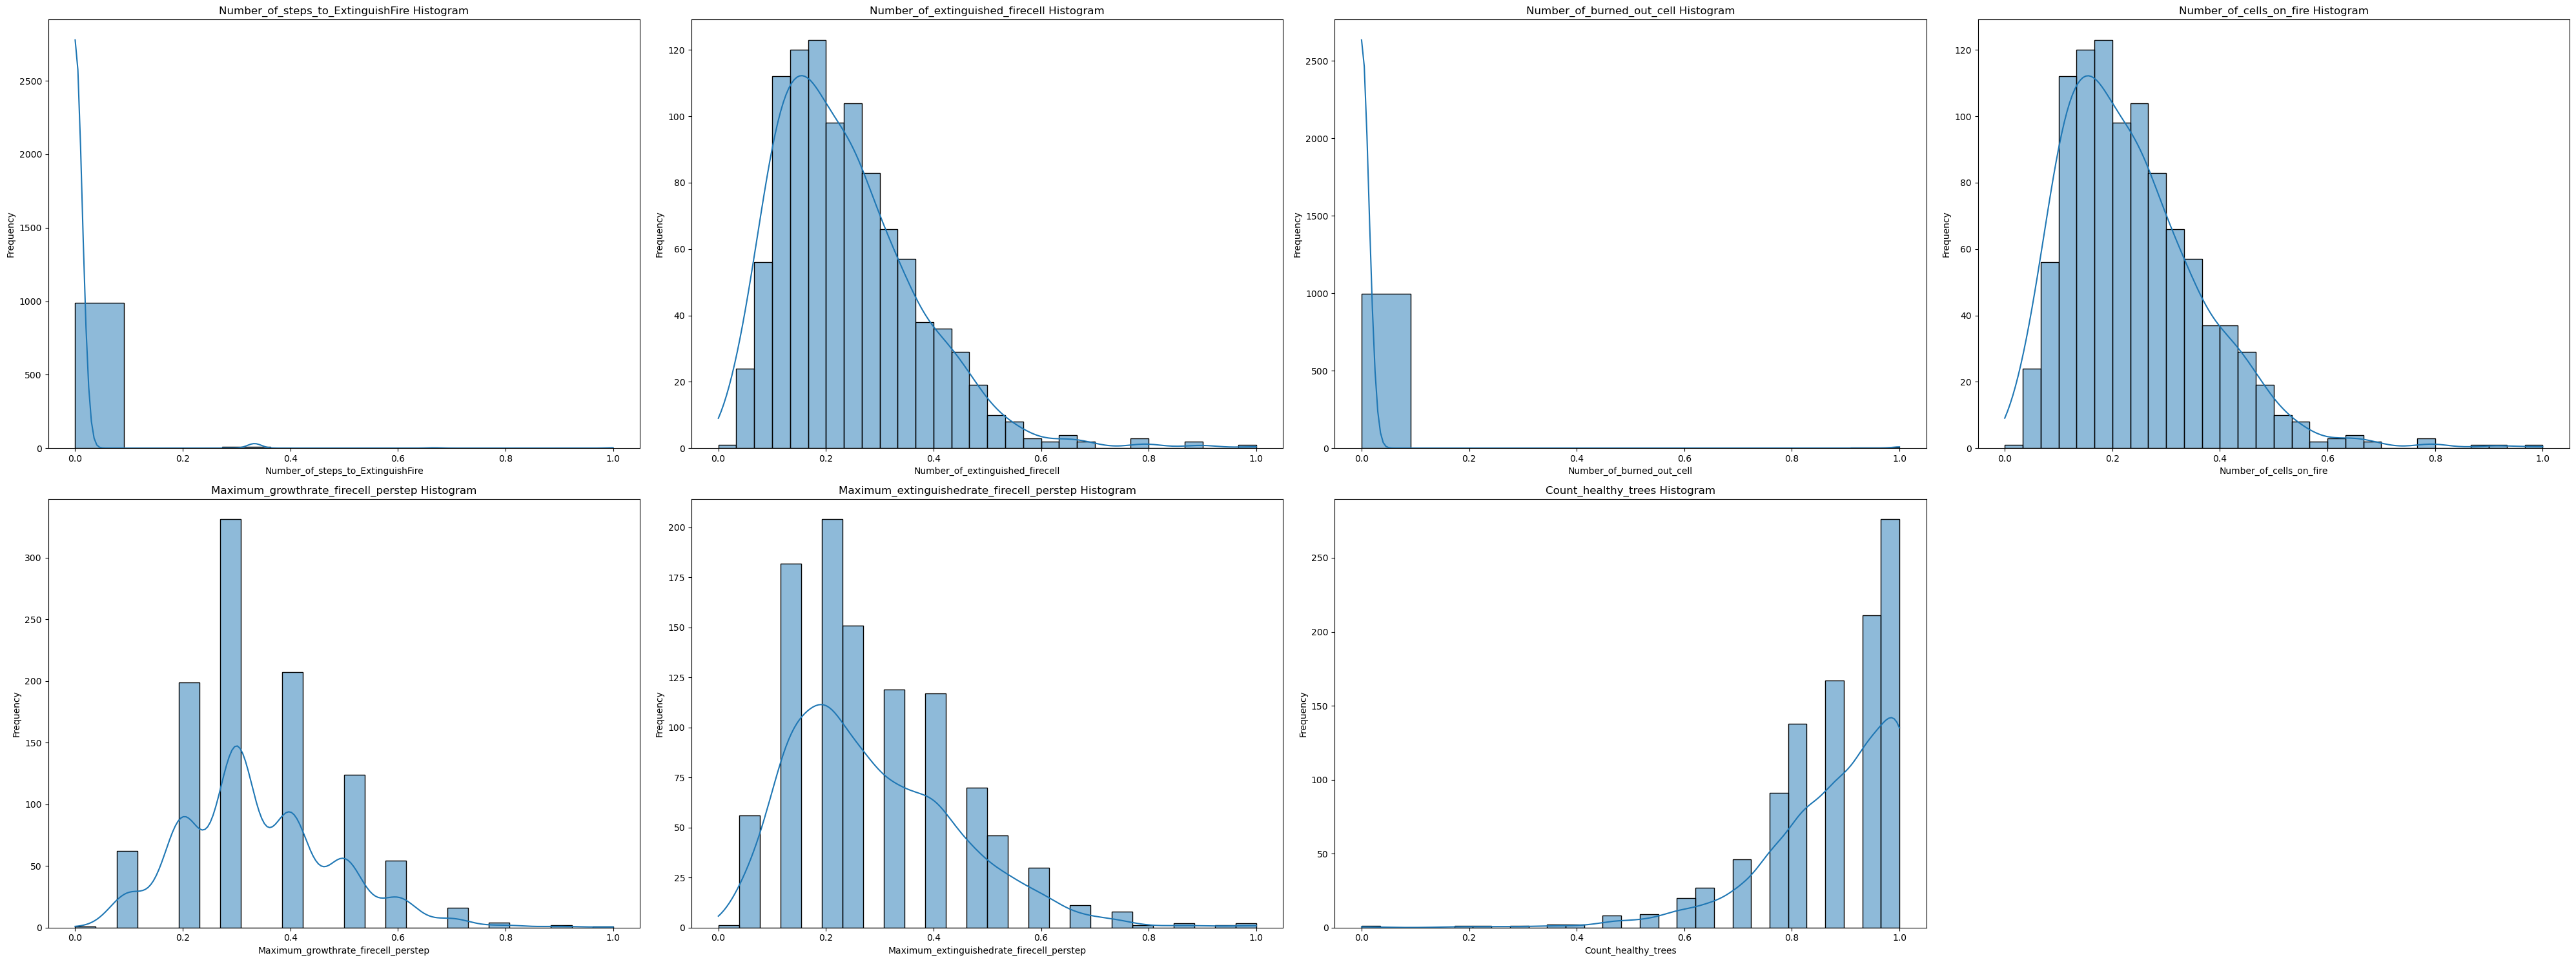

In [49]:
plot_histograms_with_annotations(scaled_df, scaled_df.columns[:7])

# Parallel_attack

In [50]:
columns_to_analyze = Parallel_attack.columns
statistics_table = compute_statistics(Parallel_attack, columns_to_analyze)
print(statistics_table)
statistics_table.to_csv('/Users/tanqingwen/Desktop/test2/Parallel attack/statistics_rawdata.csv', index=False)

                                   Parameter        min        max  \
0          Number_of_steps_to_ExtinguishFire     6.0000     6.0000   
1            Number_of_extinguished_firecell     0.0000    17.0000   
2                  Number_of_burned_out_cell     1.0000     1.0000   
3                    Number_of_cells_on_fire     1.0000    18.0000   
4        Maximum_growthrate_firecell_perstep     0.0000     9.0000   
5  Maximum_extinguishedrate_firecell_perstep     0.0000    16.0000   
6                        Count_healthy_trees  6389.0000  6399.0000   
7                      Count_unhealthy_trees     1.0000    11.0000   
8             Percentage_damaged_burnedtrees     0.0125     0.1375   

          Mean     Median  st_deviation     n  
0     6.000000     6.0000      0.000000     0  
1     5.186813     4.0000      2.947553  3338  
2     1.000000     1.0000      0.000000     0  
3     6.186813     5.0000      2.947553  3338  
4     3.115884     3.0000      1.347797   698  
5     3.836

In [51]:
scaled_df = min_max_scale_dataframe(Parallel_attack)
columns_to_analyze = scaled_df.columns
statistics_table = compute_statistics(scaled_df, columns_to_analyze)
print(statistics_table)
statistics_table.to_csv('/Users/tanqingwen/Desktop/test2/Parallel attack/statistics_newdata.csv', index=False)

                                   Parameter  min  max      Mean    Median  \
0          Number_of_steps_to_ExtinguishFire  0.0  0.0  0.000000  0.000000   
1            Number_of_extinguished_firecell  0.0  1.0  0.305107  0.235294   
2                  Number_of_burned_out_cell  0.0  0.0  0.000000  0.000000   
3                    Number_of_cells_on_fire  0.0  1.0  0.305107  0.235294   
4        Maximum_growthrate_firecell_perstep  0.0  1.0  0.346209  0.333333   
5  Maximum_extinguishedrate_firecell_perstep  0.0  1.0  0.239760  0.187500   
6                        Count_healthy_trees  0.0  1.0  0.886913  1.000000   
7                      Count_unhealthy_trees  0.0  1.0  0.113087  0.000000   
8             Percentage_damaged_burnedtrees  0.0  1.0  0.113087  0.000000   

   st_deviation   n  
0      0.000000   0  
1      0.173385  12  
2      0.000000   0  
3      0.173385  12  
4      0.149755   9  
5      0.145333   9  
6      0.170934  12  
7      0.170934  12  
8      0.170934  12  

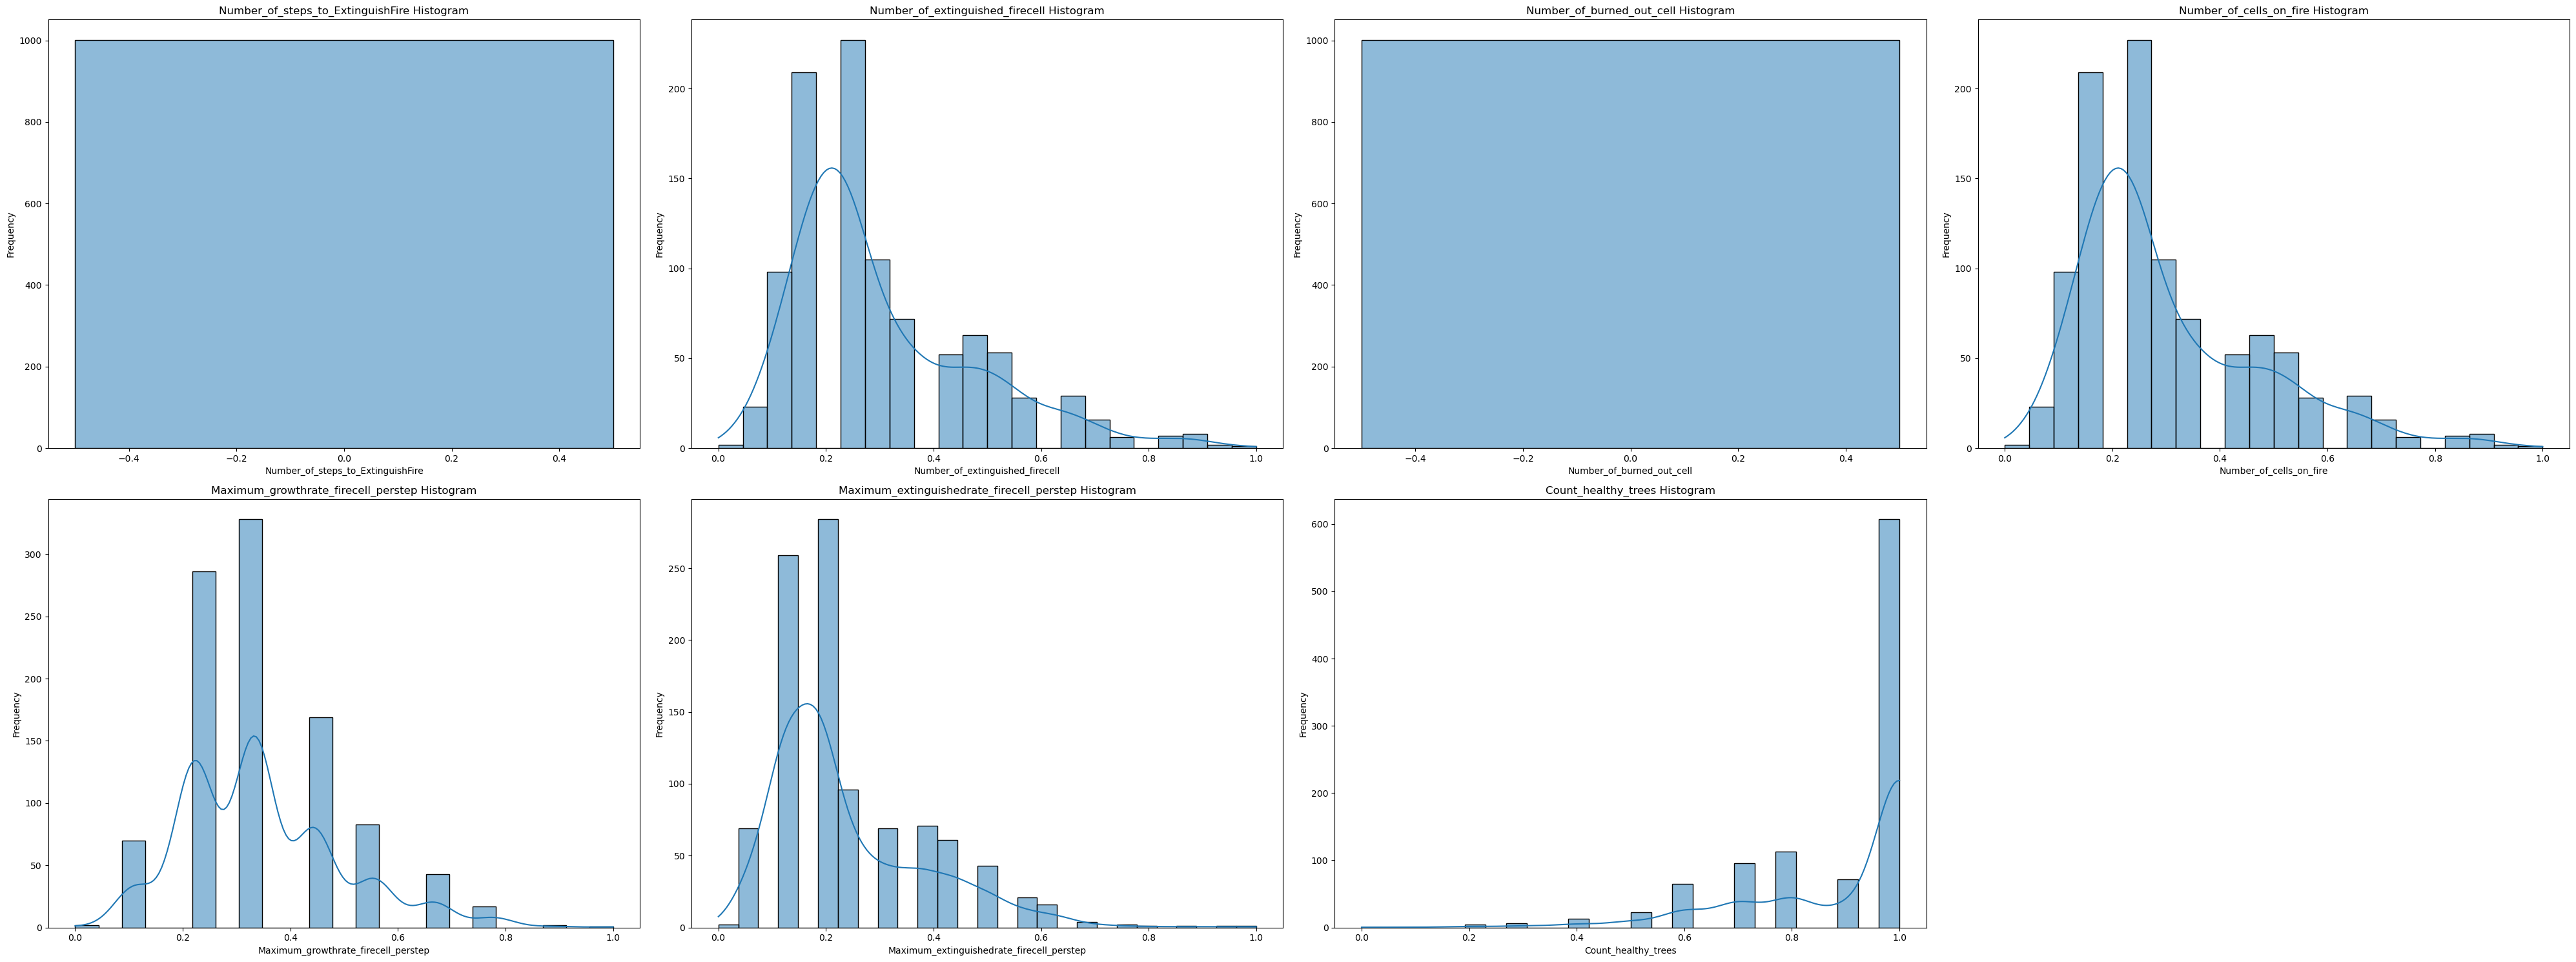

In [52]:
plot_histograms_with_annotations(scaled_df, scaled_df.columns[:7])

# Random_movements

In [53]:
columns_to_analyze = Random_movements.columns
statistics_table = compute_statistics(Random_movements, columns_to_analyze)
print(statistics_table)
statistics_table.to_csv('/Users/tanqingwen/Desktop/test2/Random movements/statistics_rawdata.csv', index=False)

                                   Parameter        min        max  \
0          Number_of_steps_to_ExtinguishFire     6.0000   256.0000   
1            Number_of_extinguished_firecell     0.0000    46.0000   
2                  Number_of_burned_out_cell     1.0000  4011.0000   
3                    Number_of_cells_on_fire     1.0000  4027.0000   
4        Maximum_growthrate_firecell_perstep     0.0000    48.0000   
5  Maximum_extinguishedrate_firecell_perstep     0.0000     8.0000   
6                        Count_healthy_trees  2389.0000  6399.0000   
7                      Count_unhealthy_trees     1.0000  4011.0000   
8             Percentage_damaged_burnedtrees     0.0125    50.1375   

          Mean     Median  st_deviation         n  
0   102.015984   100.0000     20.865468    167251  
1    17.718282    17.0000      8.100652     25209  
2  2897.035964  2905.0000    373.905802  53707700  
3  2914.754246  2924.0000    375.696513  54223366  
4    26.596404    26.0000      5.002094

In [54]:
scaled_df = min_max_scale_dataframe(Random_movements)
columns_to_analyze = scaled_df.columns
statistics_table = compute_statistics(scaled_df, columns_to_analyze)
print(statistics_table)
statistics_table.to_csv('/Users/tanqingwen/Desktop/test2/Random movements/statistics_newdata.csv', index=False)

                                   Parameter  min  max      Mean    Median  \
0          Number_of_steps_to_ExtinguishFire  0.0  1.0  0.384064  0.376000   
1            Number_of_extinguished_firecell  0.0  1.0  0.385180  0.369565   
2                  Number_of_burned_out_cell  0.0  1.0  0.722203  0.724190   
3                    Number_of_cells_on_fire  0.0  1.0  0.723734  0.726031   
4        Maximum_growthrate_firecell_perstep  0.0  1.0  0.554092  0.541667   
5  Maximum_extinguishedrate_firecell_perstep  0.0  1.0  0.397977  0.375000   
6                        Count_healthy_trees  0.0  1.0  0.277797  0.275810   
7                      Count_unhealthy_trees  0.0  1.0  0.722203  0.724190   
8             Percentage_damaged_burnedtrees  0.0  1.0  0.722203  0.724190   

   st_deviation   n  
0      0.083462   3  
1      0.176101  12  
2      0.093243   4  
3      0.093318   4  
4      0.104210   5  
5      0.138867   8  
6      0.093243   4  
7      0.093243   4  
8      0.093243   4  

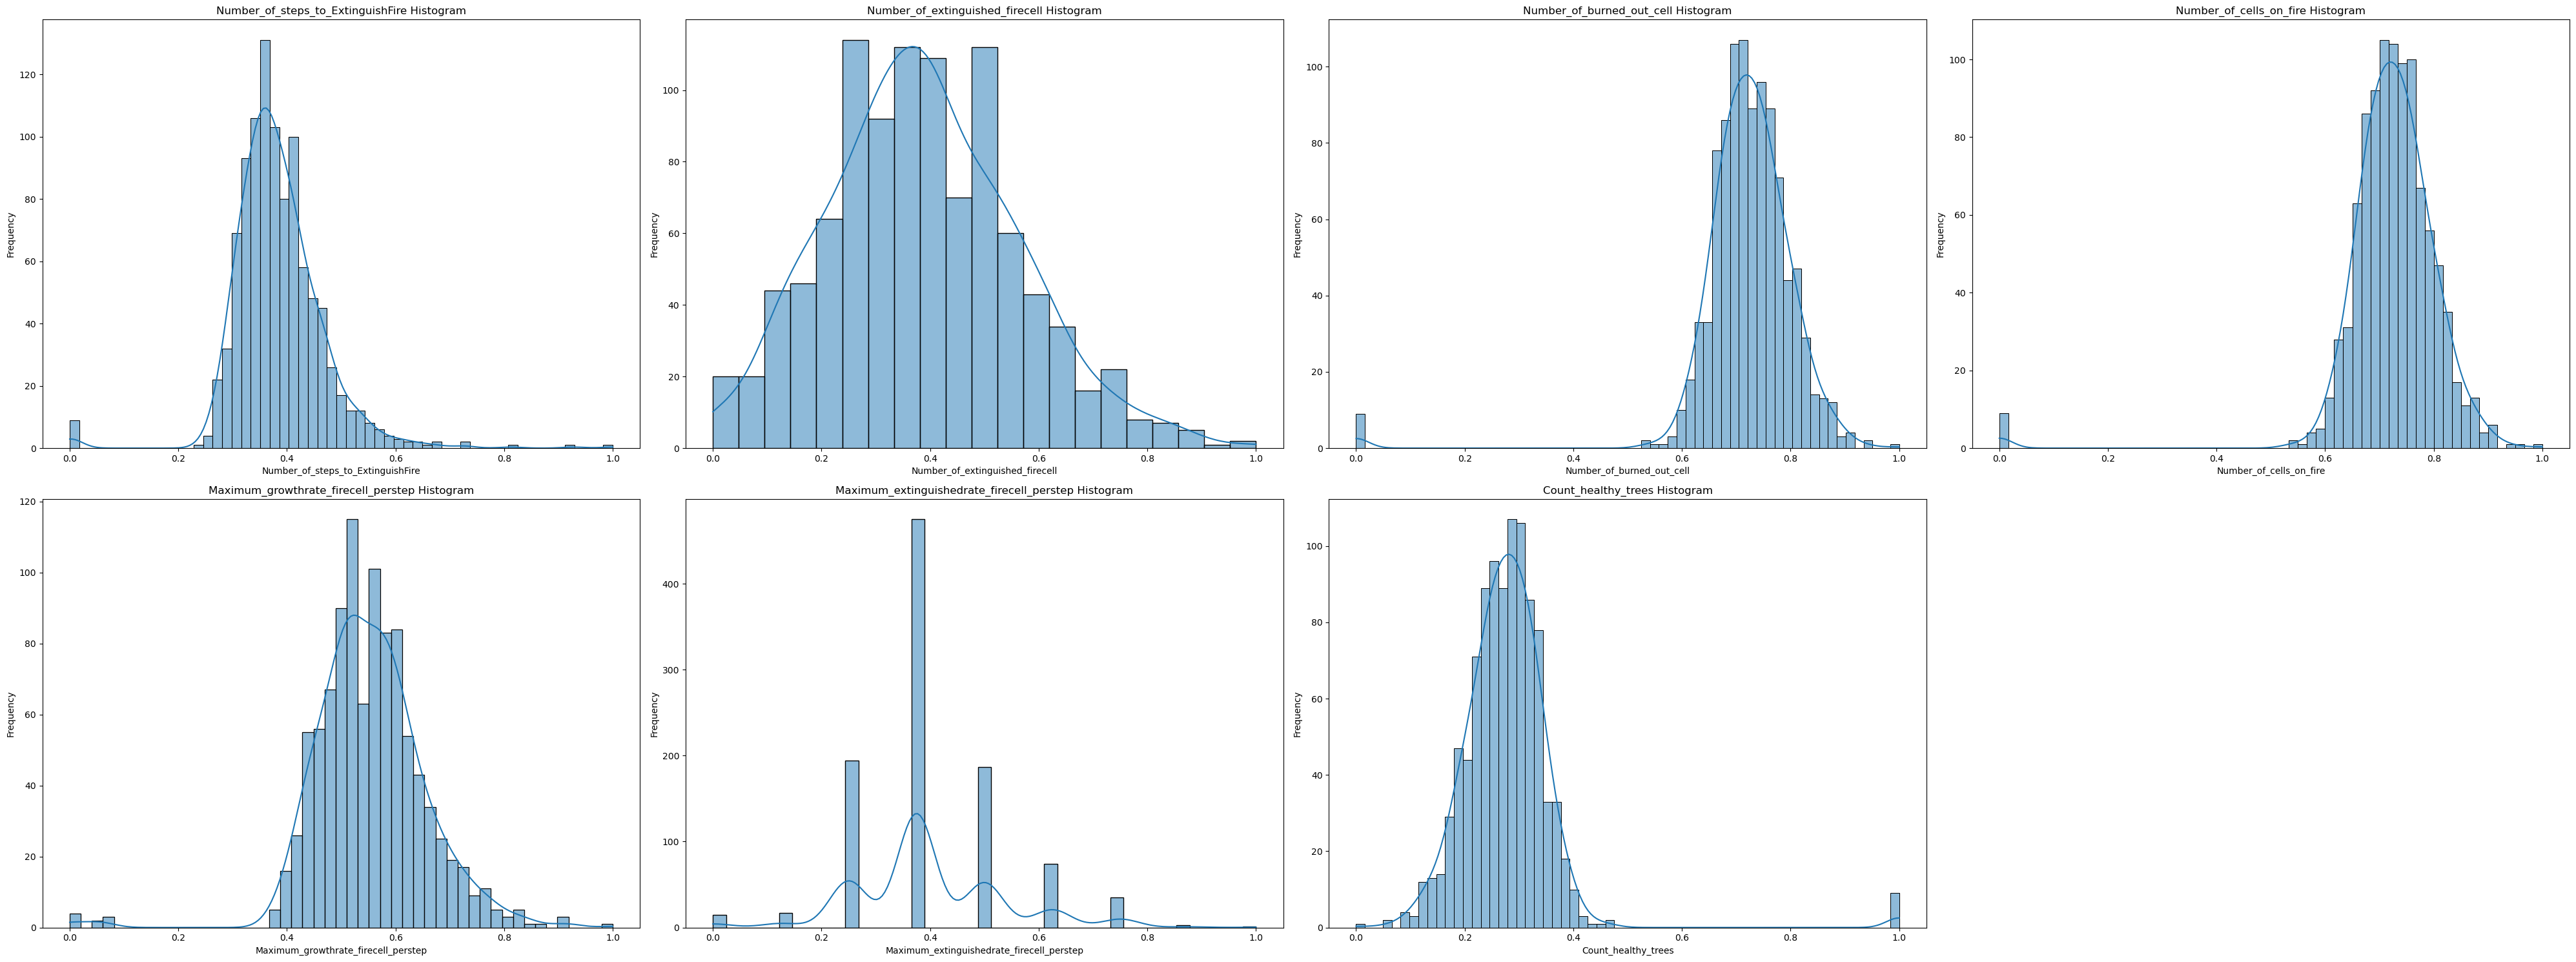

In [55]:
plot_histograms_with_annotations(scaled_df, scaled_df.columns[:7])